## <font size=5> <strong>Analysis about ED
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os
import warnings
import sys
import utils

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Binarizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Dropout, Embedding
from keras.losses import CategoricalCrossentropy
from keras.optimizers import SGD, Adam
warnings.filterwarnings('ignore')


## II. Importing and understanding our dataset 

### Load and preprocess datasets

In [2]:
dataset_0102 = utils.preprocess('0102')
print(dataset_0102.describe())
dataset_0304 = utils.preprocess('0304')
print(dataset_0304.describe())

merged_dataset = pd.concat([dataset_0102,dataset_0304],axis=0)
merged_dataset = merged_dataset.reset_index(drop=True)

age_split = utils.spilt_by_age(merged_dataset)
# divided into three parts
low_age_dataset = age_split["low_age_dataset"]
mid_age_dataset = age_split["mid_age_dataset"]
high_age_dataset = age_split["high_age_dataset"]

low_age_weights = low_age_dataset['WTMEC2YR']
low_age_dataset = low_age_dataset.drop(columns=['WTMEC2YR'])

mid_age_weights = mid_age_dataset['WTMEC2YR']
mid_age_dataset = mid_age_dataset.drop(columns=['WTMEC2YR'])

high_age_weights = high_age_dataset['WTMEC2YR']
high_age_dataset = high_age_dataset.drop(columns=['WTMEC2YR'])

weights = merged_dataset['WTMEC2YR']
merged_dataset = merged_dataset.drop(columns=['WTMEC2YR'])

     SEQN  DMDMARTL  DMDEDUC  RIAGENDR  RIDAGEEX  RIDRETH1      WTMEC2YR  \
0  9966.0       3.0      3.0       1.0     473.0       3.0  91352.991726   
1  9967.0       5.0      3.0       1.0     284.0       4.0  29456.680208   
2  9968.0       2.0      1.0       2.0    1012.0       3.0  27508.137821   
3  9969.0       1.0      3.0       2.0     612.0       3.0  78536.315892   
4  9970.0       5.0      1.0       1.0     200.0       2.0  34059.984716   

    SSTESTO  PAD320  PAD480  BMXBMI    SMQ020    ALQ101  DIQ010   BPQ040A  \
0  4.380000     1.0     2.0   30.22  1.000000  1.000000     2.0  1.220107   
1  4.973499     2.0     0.0   29.98  2.000000  1.000000     2.0  1.220107   
2  4.973499     2.0     2.0   24.62  1.000000  1.000000     2.0  1.000000   
3  4.973499     2.0     2.0   22.26  2.000000  1.000000     2.0  1.220107   
4  4.973499     1.0     3.0   39.23  1.531348  1.322294     2.0  1.220107   

    BPQ090D    MCQ220  
0  2.000000  2.000000  
1  1.494012  2.000000  
2  1.494

## Exploratory Data Analysis (EDA)

### Analysis relationship between KIQ400 and ARIDAGEEX - factors

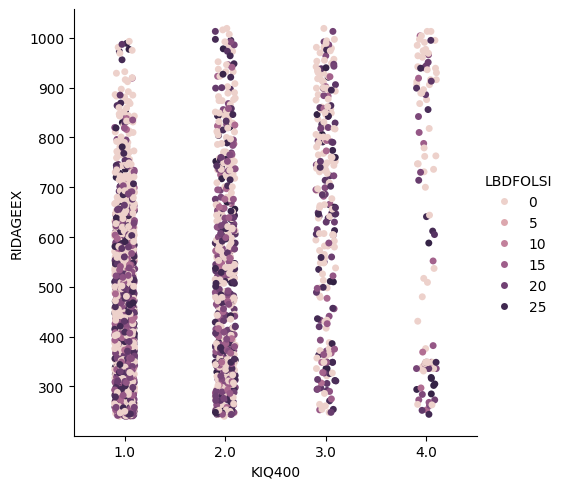

In [3]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDFOLSI')

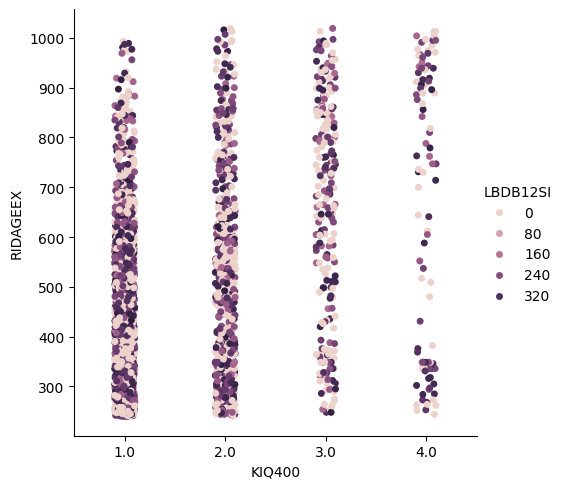

In [4]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDB12SI')

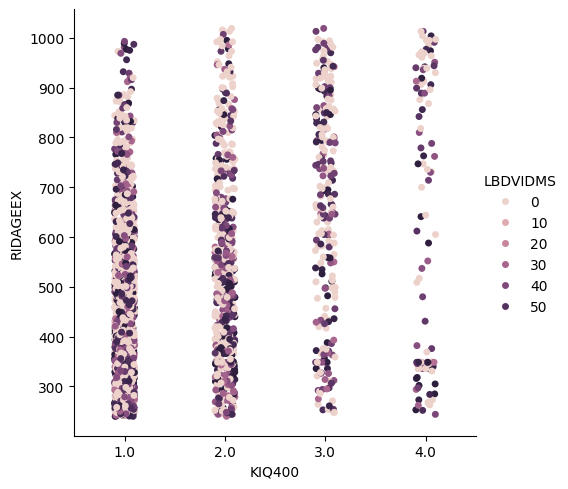

In [5]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDVIDMS')

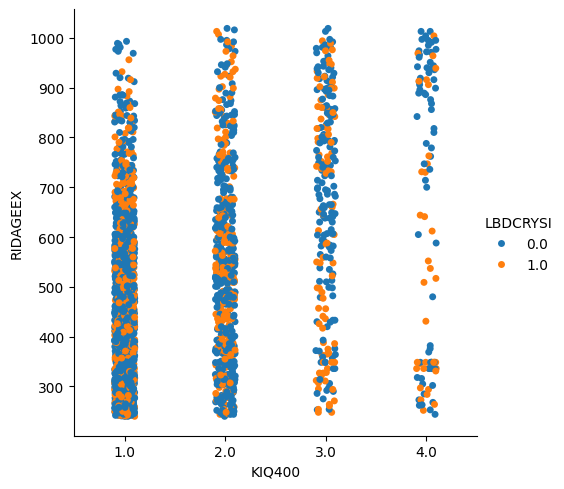

In [6]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDCRYSI')

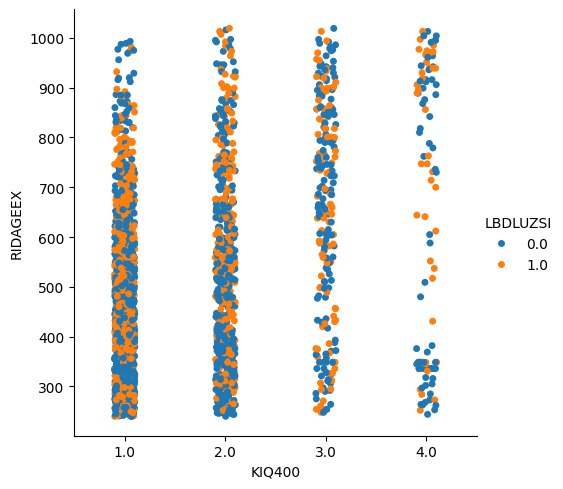

In [7]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDLUZSI')

### Analysing the target variable:

In [8]:
print(low_age_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = low_age_dataset['KIQ400'].value_counts().sort_index()

# sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')


KIQ400      1.000000
LBDCRYSI    0.098683
LBDVIDMS    0.078602
RIDAGEEX    0.044134
LBDLUZSI    0.012401
LBDB12SI    0.010591
LBDFOLSI    0.001524
Name: KIQ400, dtype: float64


In [9]:
print(mid_age_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = mid_age_dataset['KIQ400'].value_counts().sort_index()

# sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')

KIQ400      1.000000
RIDAGEEX    0.157586
LBDVIDMS    0.053123
LBDCRYSI    0.042259
LBDFOLSI    0.038164
LBDB12SI    0.035837
LBDLUZSI    0.026114
Name: KIQ400, dtype: float64


In [10]:
print(high_age_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = high_age_dataset['KIQ400'].value_counts().sort_index()

# sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')

KIQ400      1.000000
RIDAGEEX    0.311529
LBDCRYSI    0.075493
LBDLUZSI    0.065556
LBDB12SI    0.040043
LBDFOLSI    0.033581
LBDVIDMS    0.015123
Name: KIQ400, dtype: float64


In [11]:
print(merged_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = merged_dataset['KIQ400'].value_counts().sort_index()

KIQ400      1.000000
RIDAGEEX    0.336456
LBDFOLSI    0.043004
LBDVIDMS    0.034992
LBDCRYSI    0.023099
LBDB12SI    0.009455
LBDLUZSI    0.007208
Name: KIQ400, dtype: float64


### Analysing the all features

#### Low age

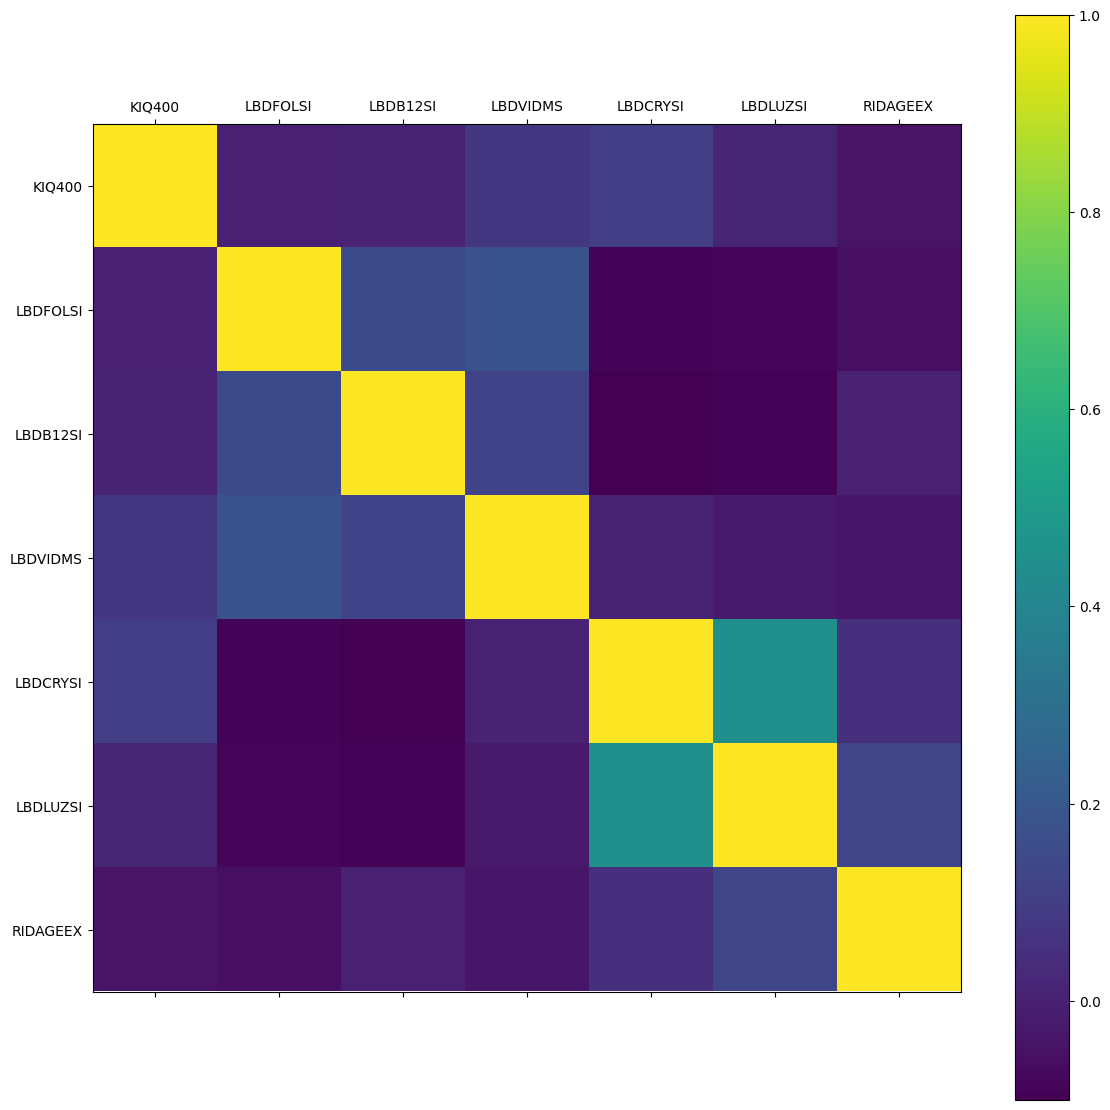

In [12]:
rcParams['figure.figsize'] = 16, 14
plt.matshow(low_age_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.colorbar()
plt.show()

#### Mid age

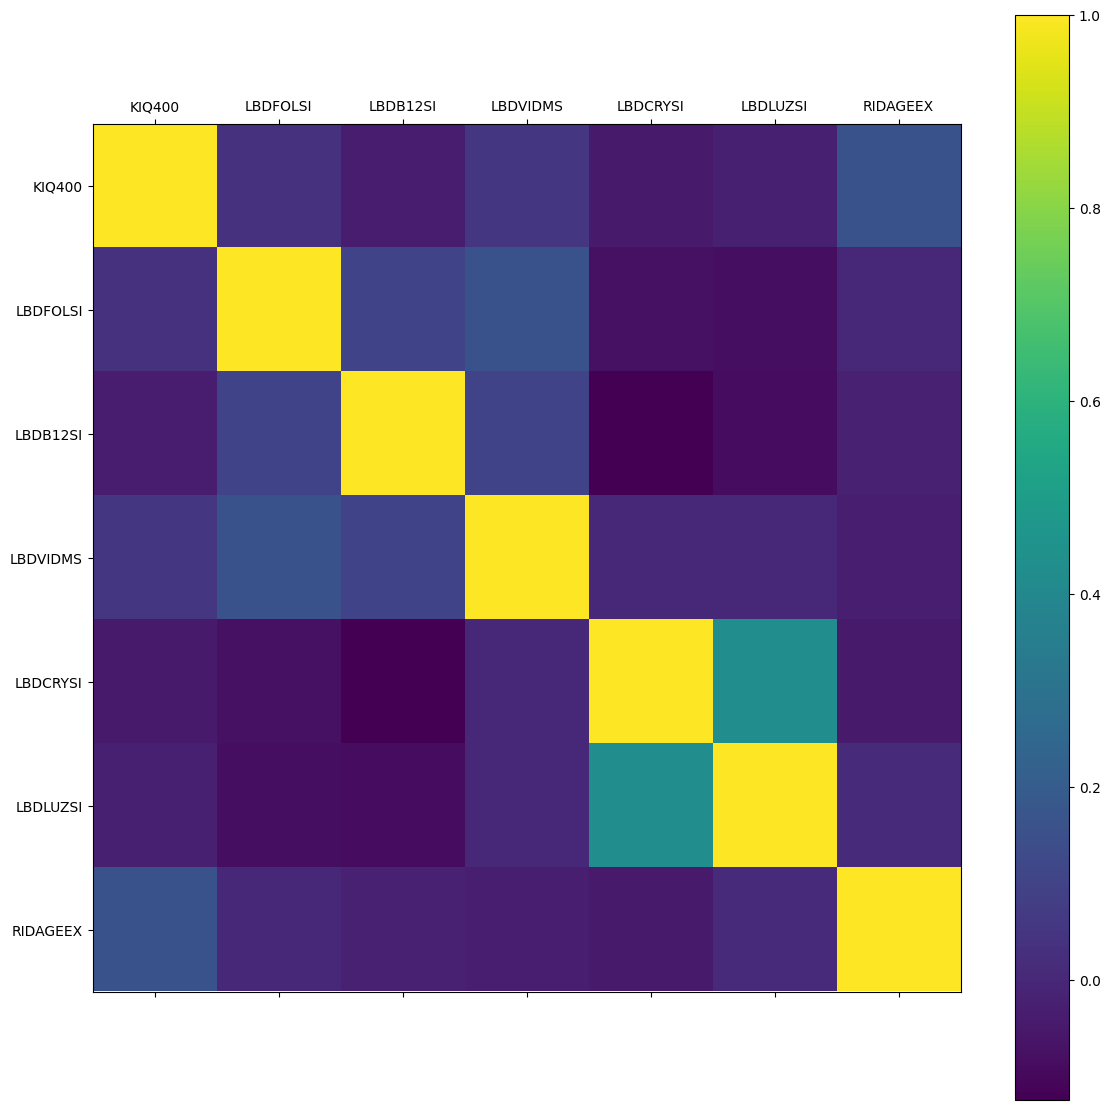

In [13]:
rcParams['figure.figsize'] = 16, 14
plt.matshow(mid_age_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.colorbar()
plt.show()

#### High age

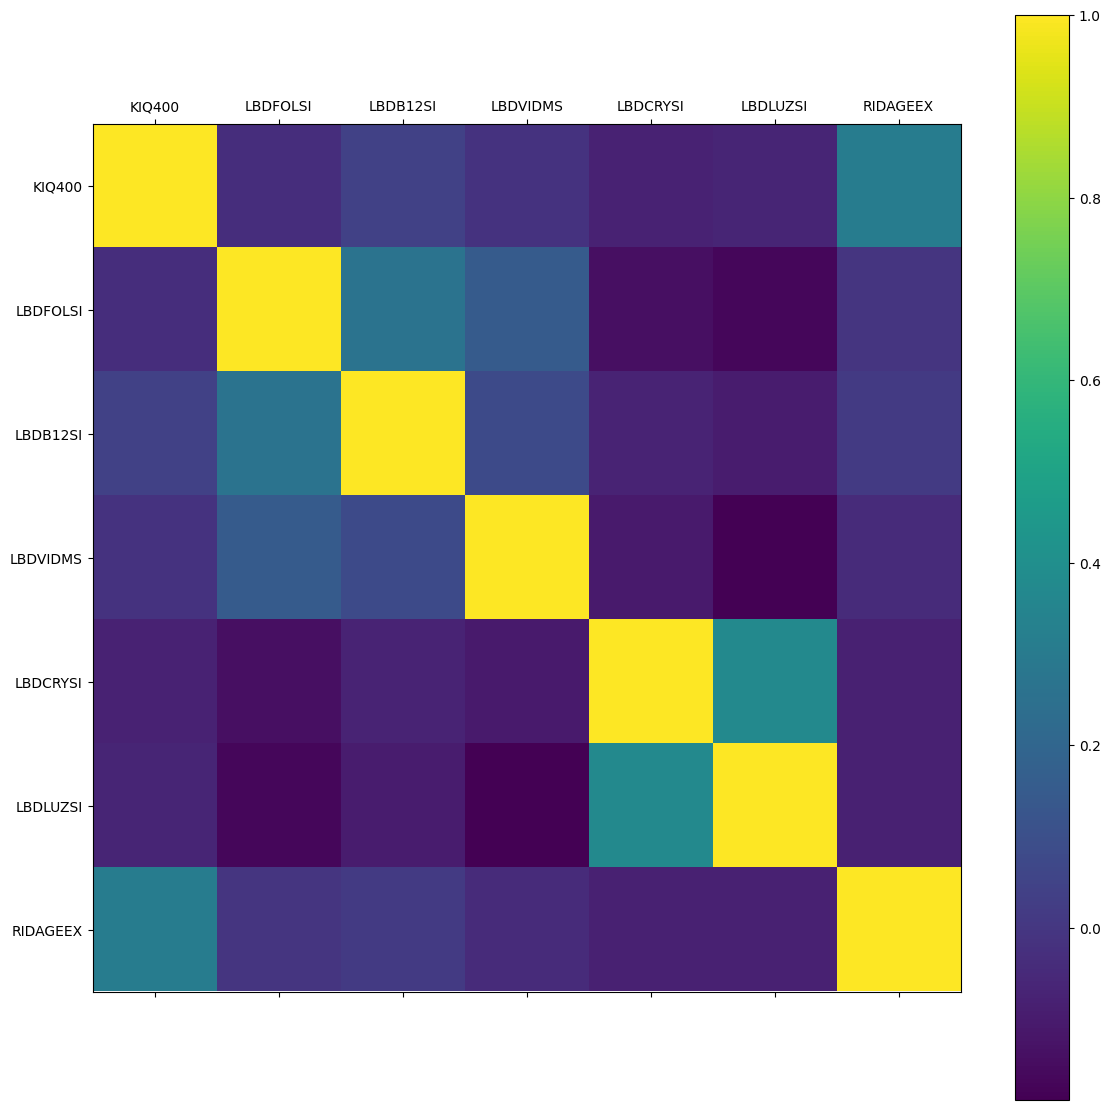

In [14]:
rcParams['figure.figsize'] = 16, 14
plt.matshow(high_age_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.colorbar()
plt.show()

## IV. Train Test split

### Params

In [15]:
test_size=0.40
random_state=42

#### Low age

In [16]:
# predictors = merged_dataset.drop("KIQ400", axis=1)
# normalization
# for col in predictors.columns:
#     predictors[col] = (predictors[col] - predictors[col].min()) / (predictors[col].max() - predictors[col].min())

# print(predictors)
predictors_low_age = low_age_dataset.drop(["KIQ400","RIDAGEEX"],axis=1)
target_low_age = low_age_dataset["KIQ400"]

X_train_la, X_test_la, Y_train_la, Y_test_la,weight_train_la,weight_test_la = train_test_split(predictors_low_age, target_low_age, low_age_weights,test_size=test_size, random_state=random_state)

# scaler = StandardScaler()
# X_train_la = scaler.fit_transform(X_train_la)
# X_test_la = scaler.transform(X_test_la)

# scaler = MinMaxScaler()
# X_train_la = scaler.fit_transform(X_train_la)
# X_test_la = scaler.transform(X_test_la)

print(X_train_la.shape, X_test_la.shape, Y_train_la.shape, Y_test_la.shape,weight_train_la.shape,weight_test_la.shape)
print(X_train_la,X_test_la)

(877, 5) (585, 5) (877,) (585,) (877,) (585,)
      LBDFOLSI  LBDB12SI  LBDVIDMS  LBDCRYSI  LBDLUZSI
442       13.8      0.00      58.7       0.0       0.0
319        0.0    321.03      30.2       0.0       0.0
767       18.6    369.00      53.2       1.0       1.0
756        0.0      0.00      48.3       1.0       1.0
424       15.4    338.00      46.8       1.0       1.0
...        ...       ...       ...       ...       ...
1130      17.7      0.00      33.6       1.0       1.0
1294      23.6    260.51      50.8       0.0       1.0
860       22.4      0.00       0.0       1.0       1.0
1459      20.8      0.00      53.2       0.0       0.0
1126      24.9    343.17      58.1       0.0       0.0

[877 rows x 5 columns]       LBDFOLSI  LBDB12SI  LBDVIDMS  LBDCRYSI  LBDLUZSI
892       17.7    369.00      53.2       0.0       0.0
1106      15.2    256.09       0.0       1.0       1.0
413        0.0    310.70      56.3       1.0       1.0
522        0.0      0.00      56.3       0.0      

#### Mid age

In [17]:
predictors_mid_age = mid_age_dataset.drop(["KIQ400","RIDAGEEX"],axis=1)
target_mid_age = mid_age_dataset["KIQ400"]

X_train_md, X_test_md, Y_train_md, Y_test_md,weight_train_md,weight_test_md = train_test_split(predictors_mid_age, target_mid_age, mid_age_weights,test_size=test_size, random_state=random_state)

# scaler = StandardScaler()
# X_train_md = scaler.fit_transform(X_train_md)
# X_test_md = scaler.transform(X_test_md)
print(X_train_md.shape, X_test_md.shape, Y_train_md.shape, Y_test_md.shape,weight_train_md.shape,weight_test_md.shape)

(525, 5) (351, 5) (525,) (351,) (525,) (351,)


#### High age

In [18]:
predictors_high_age = high_age_dataset.drop(["KIQ400","RIDAGEEX"],axis=1)
target_high_age = high_age_dataset["KIQ400"]

X_train_hd, X_test_hd, Y_train_hd, Y_test_hd,weight_train_hd,weight_test_hd = train_test_split(predictors_high_age, target_high_age, high_age_weights,test_size=test_size, random_state=random_state)

# scaler = StandardScaler()
# X_train_hd = scaler.fit_transform(X_train_hd)
# X_test_hd = scaler.transform(X_test_hd)
print(X_train_hd.shape, X_test_hd.shape, Y_train_hd.shape, Y_test_hd.shape,weight_train_hd.shape,weight_test_hd.shape)

(236, 5) (158, 5) (236,) (158,) (236,) (158,)


#### Total 

In [19]:
predictors = merged_dataset.drop(["KIQ400","RIDAGEEX"],axis=1)
target = merged_dataset["KIQ400"]

X_train, X_test, Y_train, Y_test,weight_train,weight_test = train_test_split(predictors, target, weights,test_size=test_size, random_state=random_state)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# scaler = MinMaxScaler()
# X_train_la = scaler.fit_transform(X_train_la)
# X_test_la = scaler.transform(X_test_la)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,weight_train.shape,weight_test.shape)
print(X_train,X_test)

(1641, 5) (1095, 5) (1641,) (1095,) (1641,) (1095,)
      LBDFOLSI  LBDB12SI  LBDVIDMS  LBDCRYSI  LBDLUZSI
386       17.4    169.00       0.0       1.0       1.0
198       19.0    229.52       0.0       0.0       1.0
1050       0.0    185.24       0.0       0.0       0.0
590       23.6      0.00      51.6       1.0       1.0
519        0.0      0.00      56.3       1.0       0.0
...        ...       ...       ...       ...       ...
1638      15.4    360.14      40.9       1.0       1.0
1095       0.0    286.34      39.7       0.0       0.0
1130       0.0    241.33      49.2       1.0       1.0
1294       0.0      0.00       0.0       0.0       0.0
860        0.0    324.72      27.9       0.0       0.0

[1641 rows x 5 columns]       LBDFOLSI  LBDB12SI  LBDVIDMS  LBDCRYSI  LBDLUZSI
719       17.9      0.00       0.0       0.0       0.0
1551      12.9      0.00      28.8       0.0       0.0
410        0.0      0.00       0.0       0.0       1.0
1788      19.0    350.55       0.0       0.

## V. Model Fitting

### Logistic Regression

#### Low age

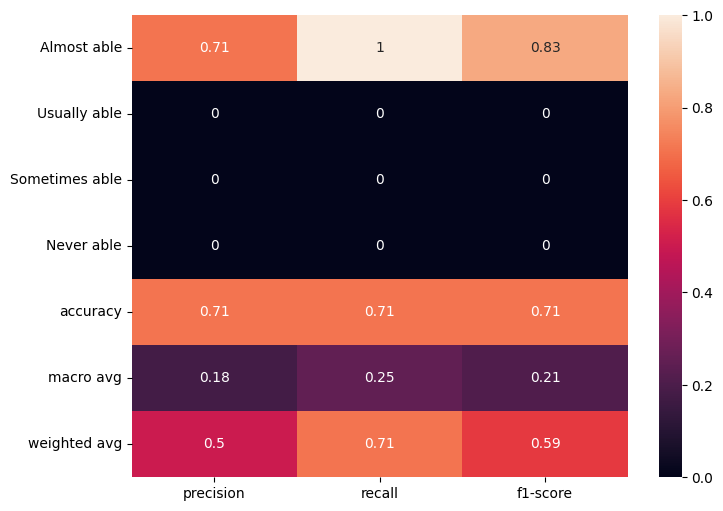

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)

Y_pred_lr = lr.predict(X_test_la)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test_la,Y_pred_lr,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [21]:
Y_pred_lr.shape

(585,)

In [22]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test_la)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 70.77 %


#### Mid age

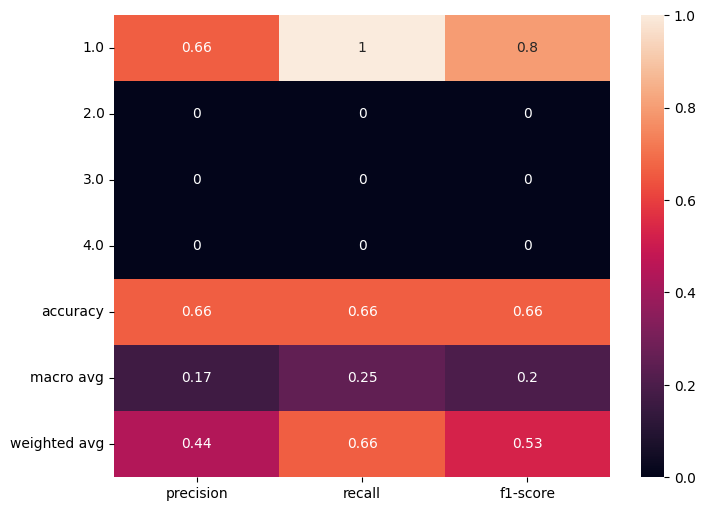

In [23]:
target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)

Y_pred_lr = lr.predict(X_test_md)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test_md,Y_pred_lr,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [24]:
Y_pred_lr.shape

(351,)

In [25]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test_md)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 66.38 %


#### High age

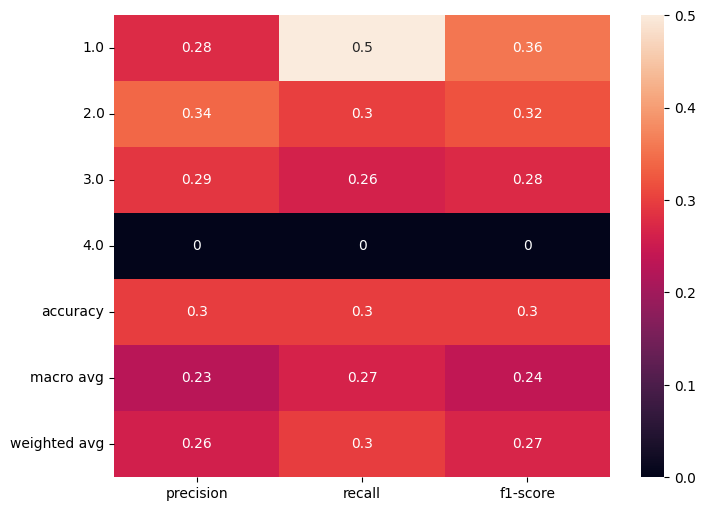

In [26]:
target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)

Y_pred_lr = lr.predict(X_test_hd)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test_hd,Y_pred_lr,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [27]:
Y_pred_lr.shape

(158,)

In [28]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test_hd)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 29.75 %


#### Total

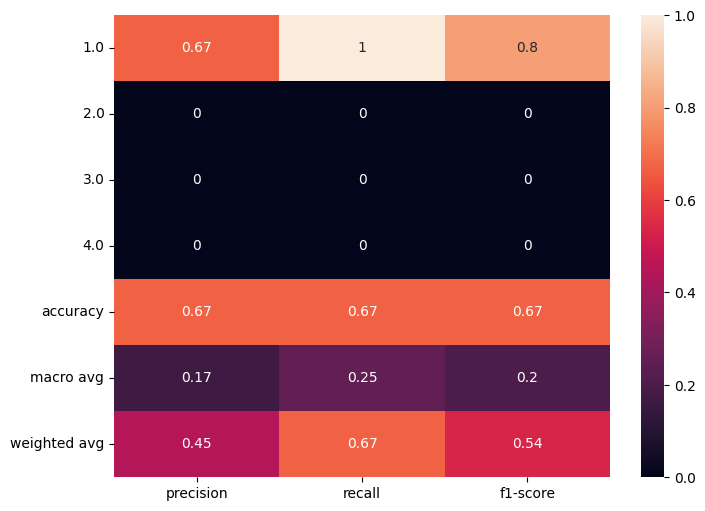

In [29]:
target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train,Y_train,sample_weight=weight_train)

Y_pred_lr = lr.predict(X_test)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test,Y_pred_lr,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [30]:
Y_pred_lr.shape

(1095,)

In [31]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 66.94 %


### Naive Bayes

#### Low age

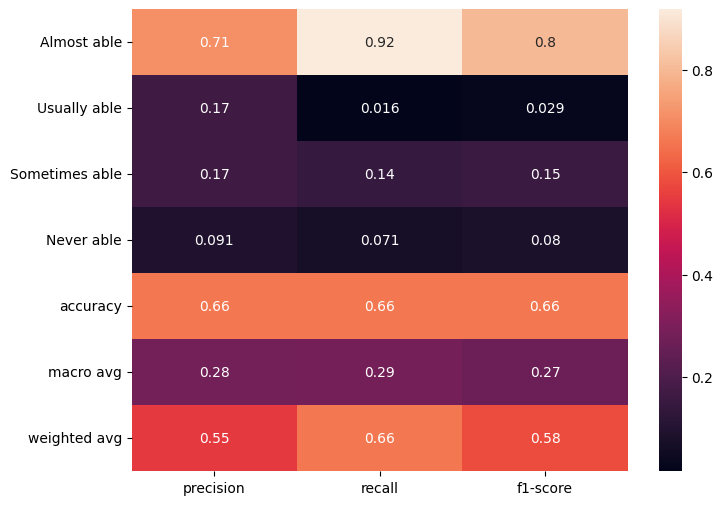

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)

Y_pred_nb = nb.predict(X_test_la)

nb_report = classification_report(Y_test_la,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [48]:
Y_pred_nb.shape

(293,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test_la)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 66.21 %


#### Mid age

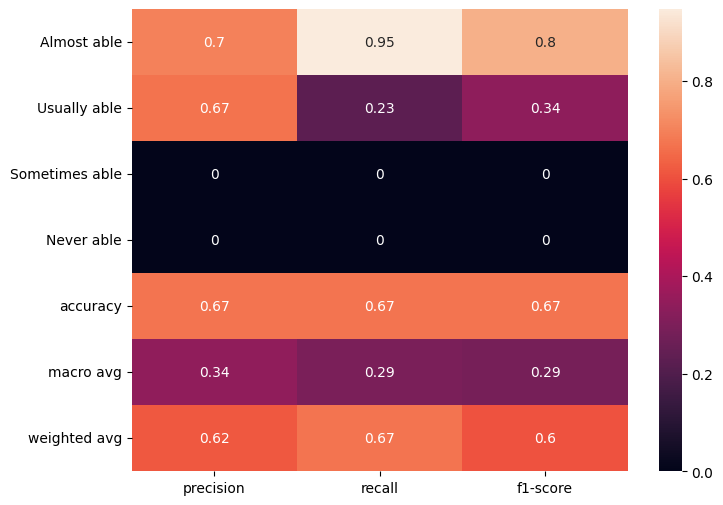

In [50]:
nb = GaussianNB()

nb.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)

Y_pred_nb = nb.predict(X_test_md)

nb_report = classification_report(Y_test_md,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [51]:
Y_pred_nb.shape

(176,)

In [52]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test_md)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 67.05 %


#### High age

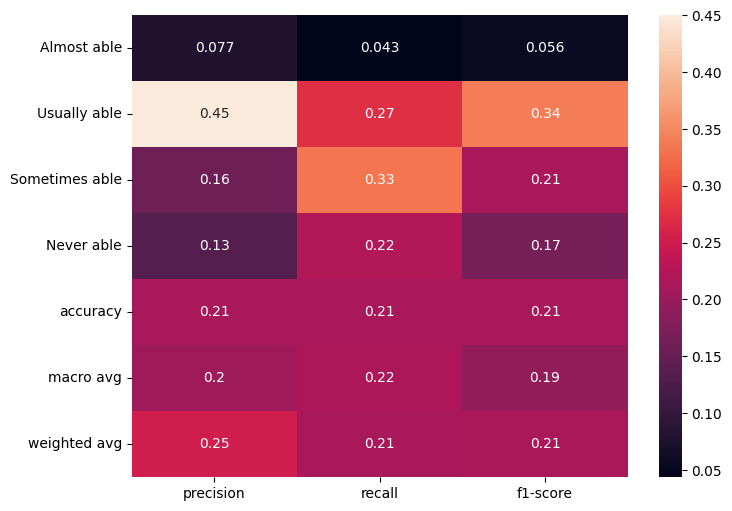

In [53]:
nb = GaussianNB()

nb.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)

Y_pred_nb = nb.predict(X_test_hd)

nb_report = classification_report(Y_test_hd,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [54]:
Y_pred_nb.shape

(80,)

In [55]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test_hd)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 21.25 %


#### Total

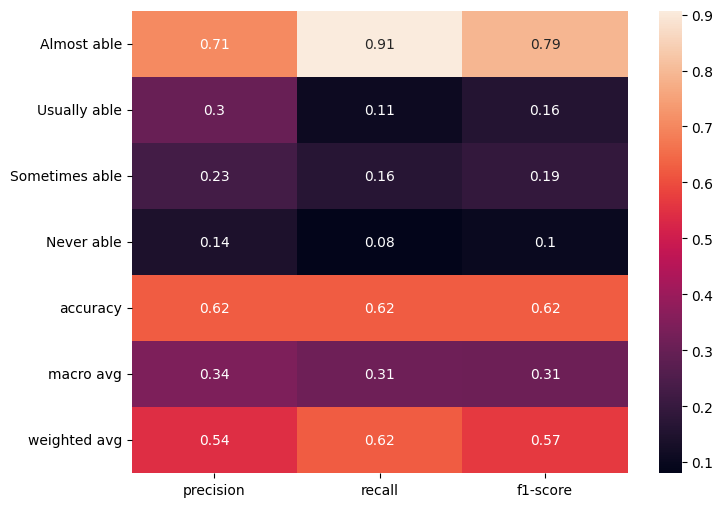

In [56]:
nb = GaussianNB()

nb.fit(X_train,Y_train,sample_weight=weight_train)

Y_pred_nb = nb.predict(X_test)

nb_report = classification_report(Y_test,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [57]:
Y_pred_nb.shape

(549,)

In [59]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 62.3 %


### SVM

#### Low age

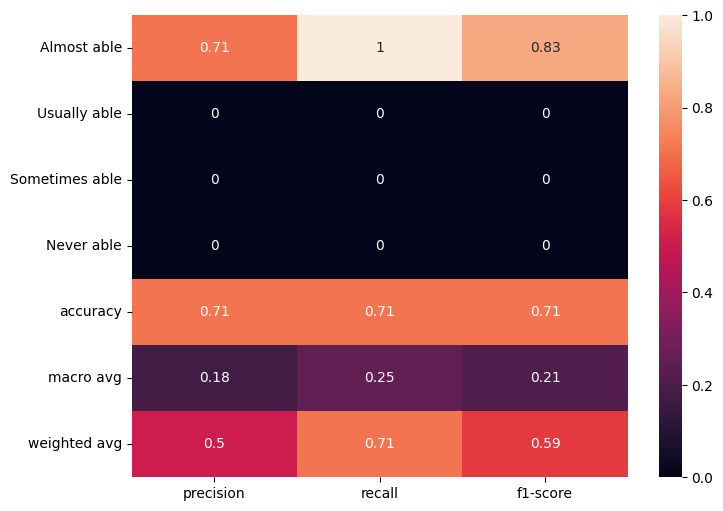

In [60]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train_la, Y_train_la)

Y_pred_svm = sv.predict(X_test_la)

svm_report = classification_report(Y_test_la,Y_pred_svm,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [61]:
Y_pred_svm.shape

(293,)

In [62]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test_la)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 70.99 %


#### Mid age

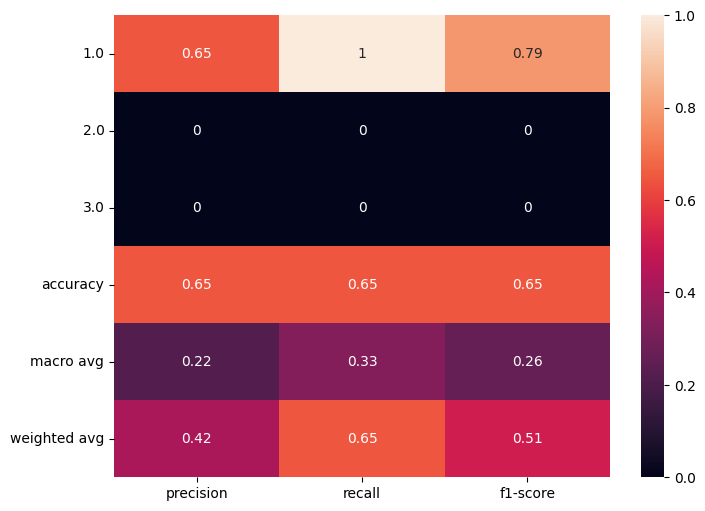

In [63]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train_md, Y_train_md)

Y_pred_svm = sv.predict(X_test_md)

svm_report = classification_report(Y_test_md,Y_pred_svm,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [64]:
Y_pred_svm.shape

(176,)

In [65]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test_md)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 64.77 %


#### High age

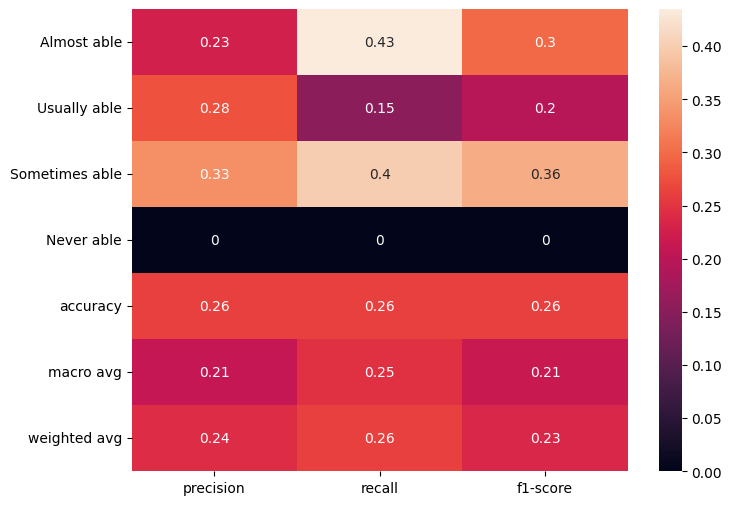

In [66]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train_hd, Y_train_hd)

Y_pred_svm = sv.predict(X_test_hd)

svm_report = classification_report(Y_test_hd,Y_pred_svm,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [67]:
Y_pred_svm.shape

(80,)

In [68]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test_hd)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 26.25 %


#### Total

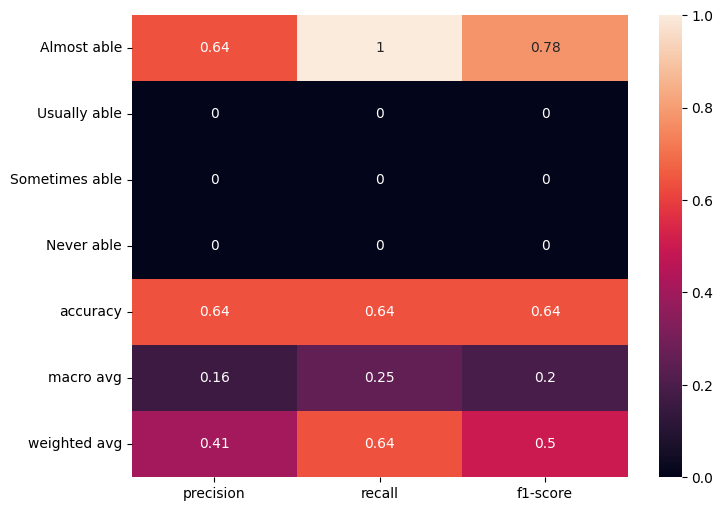

In [69]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

svm_report = classification_report(Y_test,Y_pred_svm,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [70]:
Y_pred_svm.shape

(549,)

In [71]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 63.93 %


### K Nearest Neighbors

#### Low age

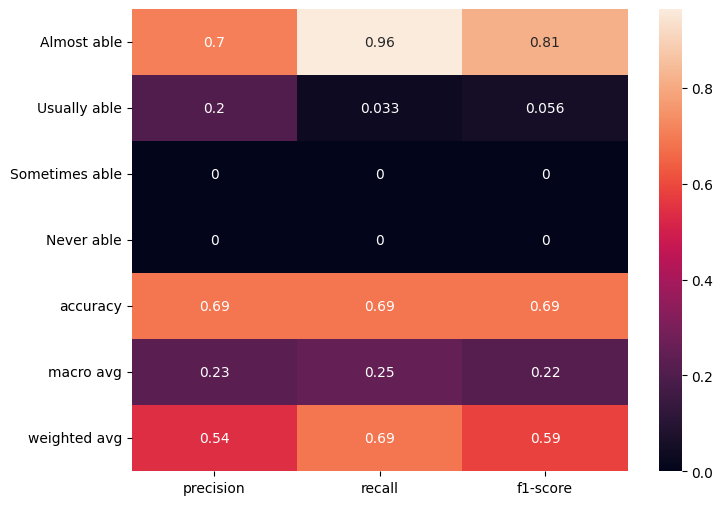

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_la,Y_train_la)
Y_pred_knn=knn.predict(X_test_la)

knn_report = classification_report(Y_test_la,Y_pred_knn,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [53]:
Y_pred_knn.shape

(586,)

In [54]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test_la)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.77 %


#### Mid age

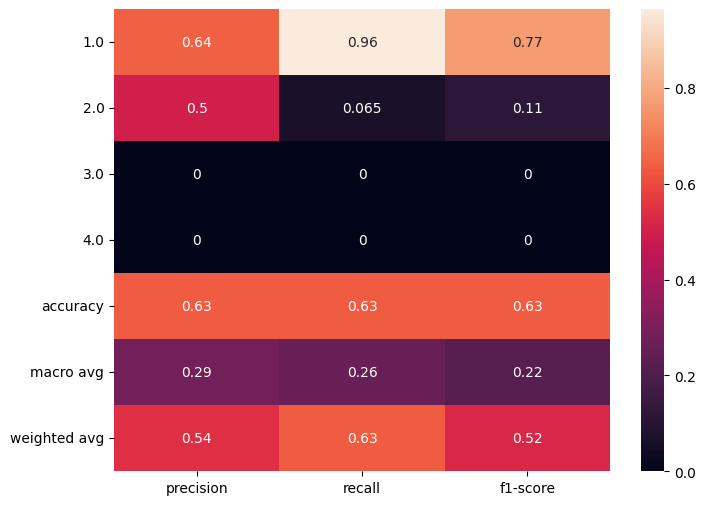

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_md,Y_train_md)
Y_pred_knn=knn.predict(X_test_md)

knn_report = classification_report(Y_test_md,Y_pred_knn,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [56]:
Y_pred_knn.shape

(352,)

In [57]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test_md)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 63.35 %


#### High age

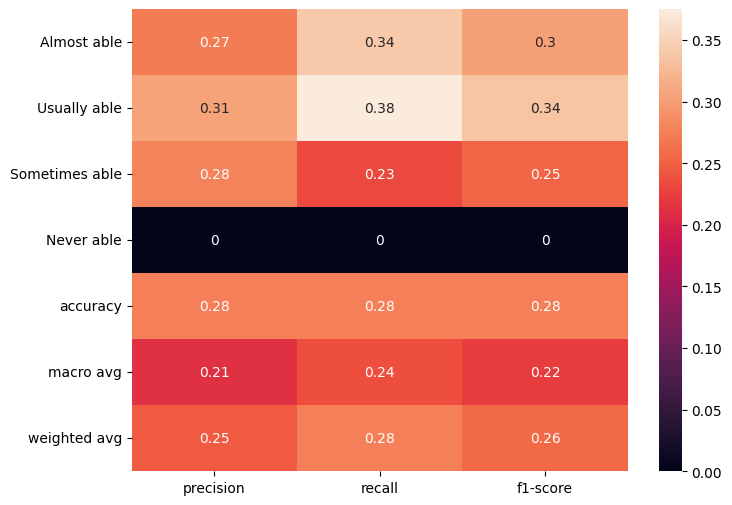

In [58]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_hd,Y_train_hd)
Y_pred_knn=knn.predict(X_test_hd)

knn_report = classification_report(Y_test_hd,Y_pred_knn,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [59]:
Y_pred_knn.shape

(160,)

In [60]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test_hd)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 27.5 %


#### Total

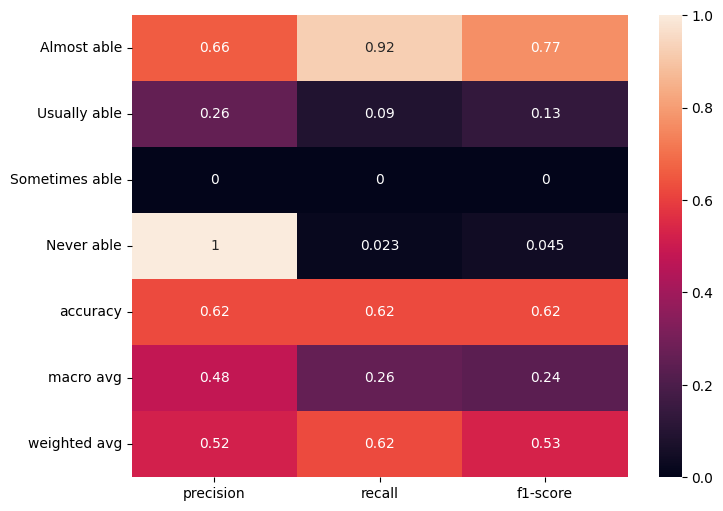

In [61]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

knn_report = classification_report(Y_test,Y_pred_knn,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [62]:
Y_pred_knn.shape

(1098,)

In [63]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 62.3 %


### Decision Tree

#### Low age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 58.19
best x: 2459


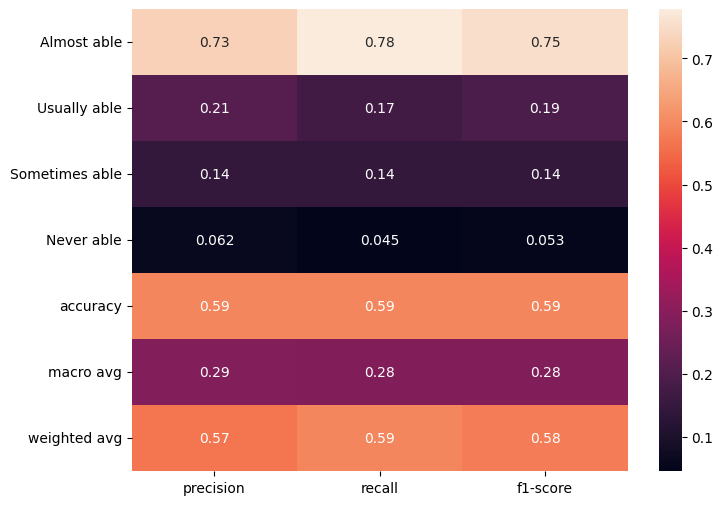

In [71]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(5000):
    utils.show_progress(5000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)
    Y_pred_dt = dt.predict(X_test_la)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test_la)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_la,Y_train_la)
Y_pred_dt = dt.predict(X_test_la)

dt_report = classification_report(Y_test_la,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [72]:
print(Y_pred_dt.shape)

(586,)


In [73]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test_la)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 59.39 %


#### Mid age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 55.68
best x: 569


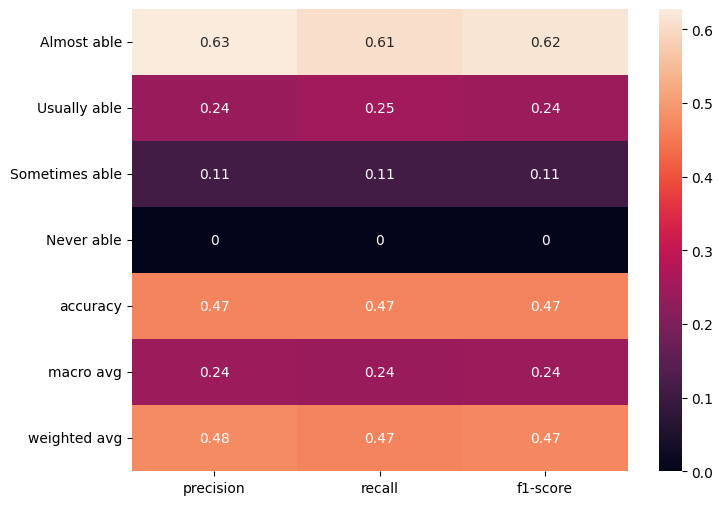

In [87]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)
    Y_pred_dt = dt.predict(X_test_md)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test_md)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_md,Y_train_md)
Y_pred_dt = dt.predict(X_test_md)

dt_report = classification_report(Y_test_md,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [88]:
print(Y_pred_dt.shape)

(176,)


In [89]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test_md)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 46.59 %


#### High age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 36.25
best x: 368


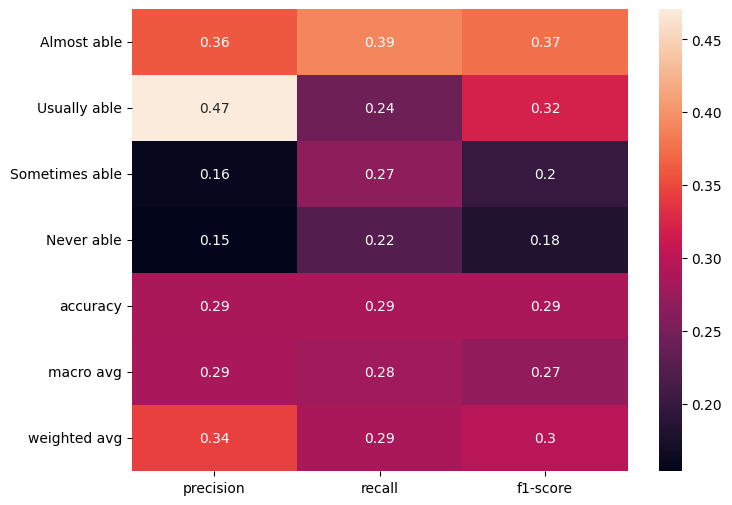

In [90]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)
    Y_pred_dt = dt.predict(X_test_hd)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test_hd)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_hd,Y_train_hd)
Y_pred_dt = dt.predict(X_test_hd)

dt_report = classification_report(Y_test_hd,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [91]:
print(Y_pred_dt.shape)

(80,)


In [92]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test_hd)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 28.75 %


#### Total

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 50.09
best x: 2511


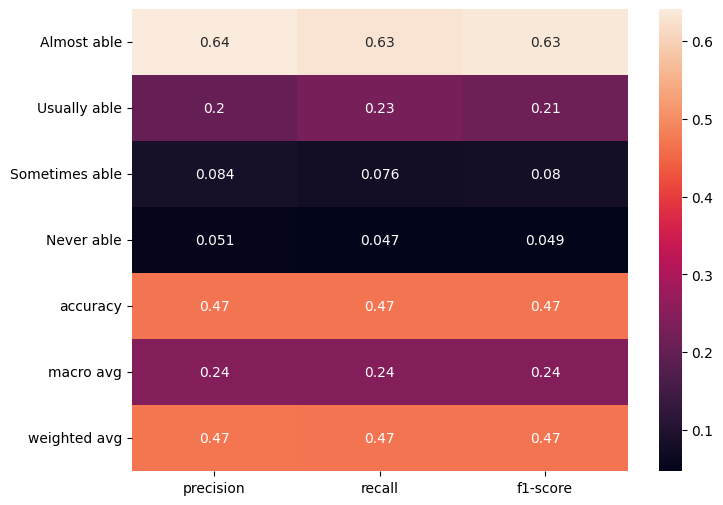

In [74]:
max_accuracy = 0


for x in range(3000):
    utils.show_progress(3000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train,sample_weight=weight_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

dt_report = classification_report(Y_test,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [75]:
print(Y_pred_dt.shape)

(1098,)


In [76]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 46.72 %


### Random Forest

#### Low age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 72.01
best x: 916


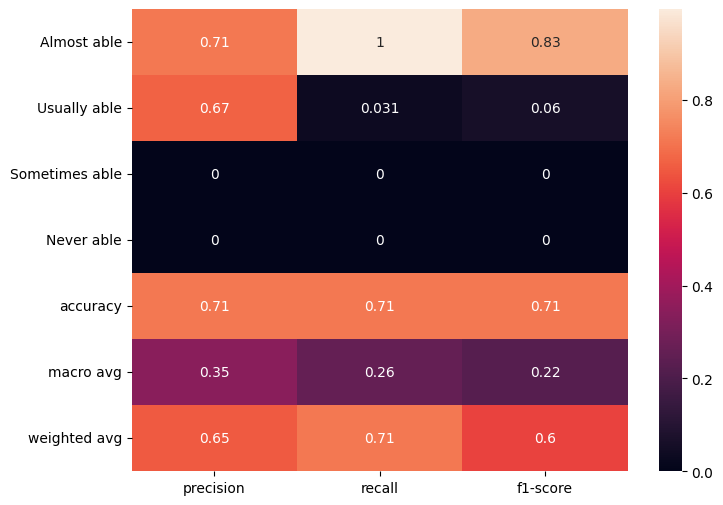

In [96]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)
    Y_pred_rf = rf.predict(X_test_la)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test_la)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_la,Y_train_la)
Y_pred_rf = rf.predict(X_test_la)

rf_report = classification_report(Y_test_la,Y_pred_rf,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [97]:
Y_pred_rf.shape

(293,)

In [98]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test_la)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 71.33 %


#### Mid age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 71.24
best x: 75


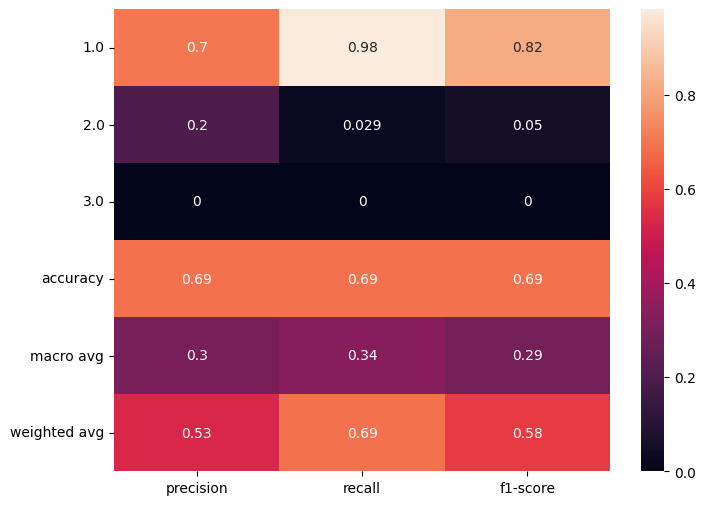

In [89]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)
    Y_pred_rf = rf.predict(X_test_md)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test_md)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_md,Y_train_md)
Y_pred_rf = rf.predict(X_test_md)

rf_report = classification_report(Y_test_md,Y_pred_rf,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [90]:
Y_pred_rf.shape

(153,)

In [91]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test_md)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 68.63 %


#### High age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 31.34
best x: 197


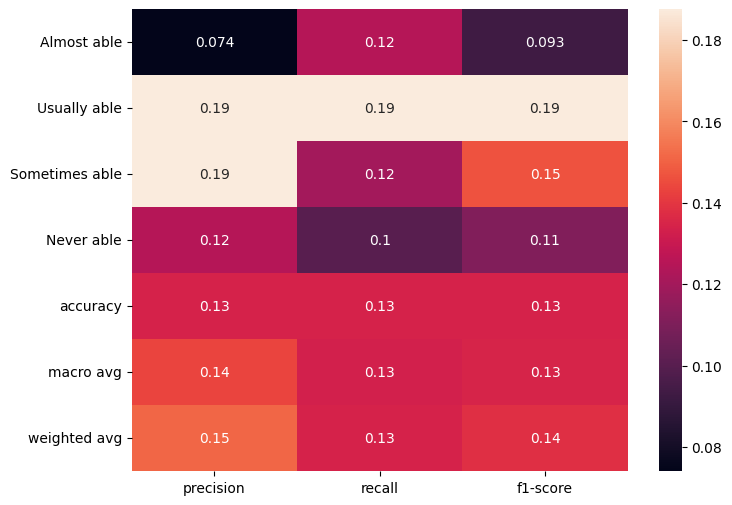

In [92]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)
    Y_pred_rf = rf.predict(X_test_hd)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test_hd)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_hd,Y_train_hd)
Y_pred_rf = rf.predict(X_test_hd)

rf_report = classification_report(Y_test_hd,Y_pred_rf,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [93]:
Y_pred_rf.shape

(67,)

In [94]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test_hd)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 13.43 %


#### Total

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 65.57
best x: 273


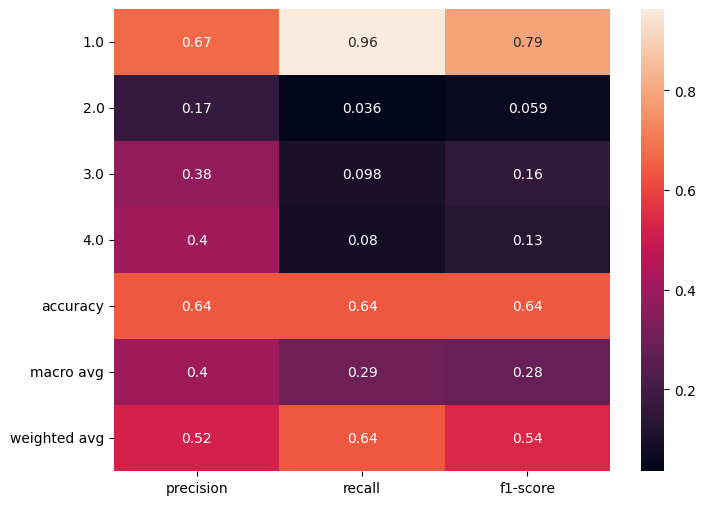

In [99]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train,Y_train,sample_weight=weight_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

rf_report = classification_report(Y_test,Y_pred_rf,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [100]:
Y_pred_rf.shape

(549,)

In [101]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 63.75 %


## VI. Output final score

In [127]:
# scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
# algorithms = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest"]    

# for i in range(len(algorithms)):
#     print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [128]:
# sns.set(rc={'figure.figsize':(15,8)})
# plt.xlabel("Algorithms")
# plt.ylabel("Accuracy score")

# sns.barplot(x=algorithms,y=scores)